In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Define the data
data = {
    'Category': ['Repeaters'] * 4 + ['Runners'] * 4 + ['Strangers'] * 4,
    'Method': ['Linear Regression', 'Moving Average', 'Holts', 'Holt-Winters'] * 3,
    'MAD': [88.2001,72.0074,127.3644,67.5267,0.4645,0.2139,0.3671,0.3907,22.7408,9.2362,16.9096,21.1840],
    'MSE': [44092.4793,32527.4065,102094.4457,94748.5991,0.4767,0.1388,0.4258,0.3475,32754.3816,13161.9235,42813.0957,36514.3040],
    'MAPE': [1.8189,1.4843,2.9877,5.8243,11.5172,5.1007,8.9275,9.3837,6.6674,1.8640,4.2114,5.9793]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Category,Method,MAD,MSE,MAPE
0,Repeaters,Linear Regression,88.2001,44092.4793,1.8189
1,Repeaters,Moving Average,72.0074,32527.4065,1.4843
2,Repeaters,Holts,127.3644,102094.4457,2.9877
3,Repeaters,Holt-Winters,67.5267,94748.5991,5.8243
4,Runners,Linear Regression,0.4645,0.4767,11.5172
5,Runners,Moving Average,0.2139,0.1388,5.1007
6,Runners,Holts,0.3671,0.4258,8.9275
7,Runners,Holt-Winters,0.3907,0.3475,9.3837
8,Strangers,Linear Regression,22.7408,32754.3816,6.6674
9,Strangers,Moving Average,9.2362,13161.9235,1.8640


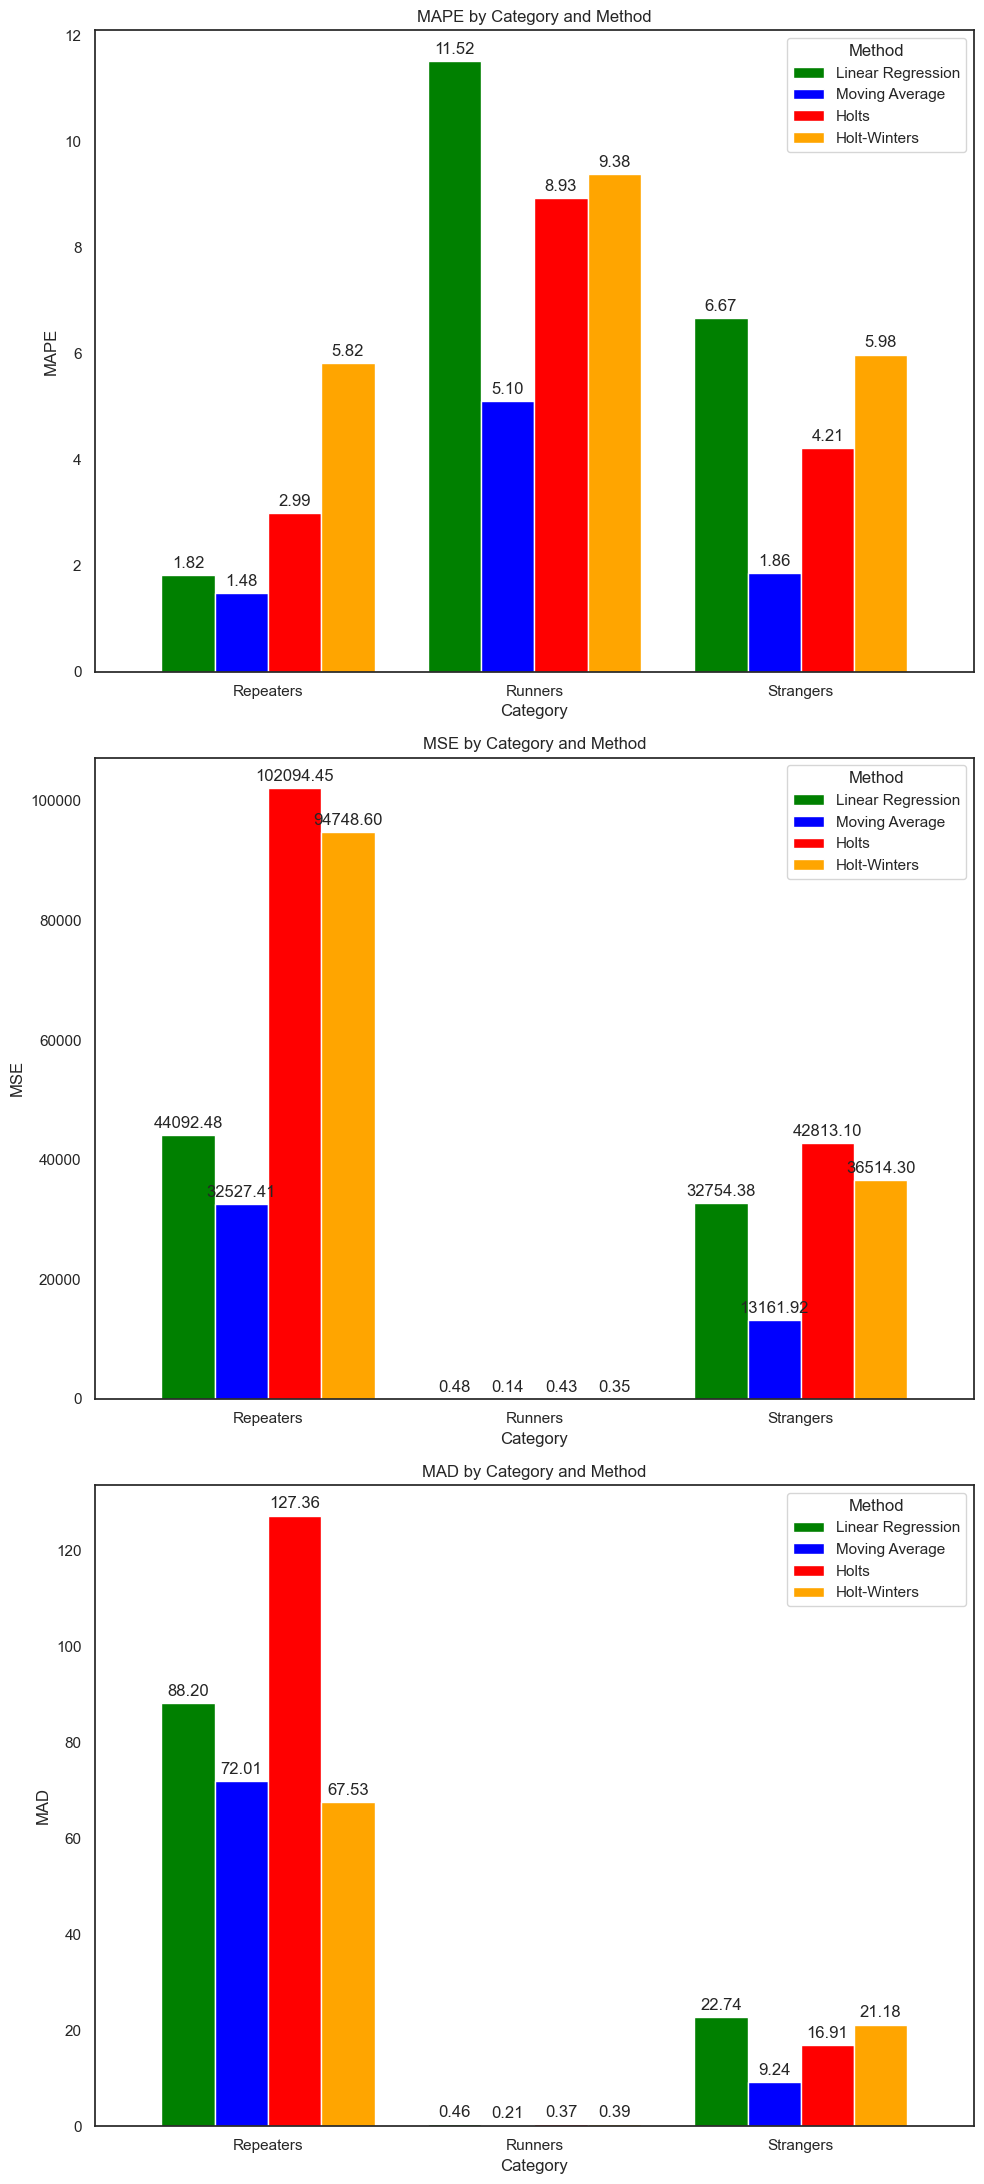

In [49]:
# Adjust figsize for clarity if needed
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 22), tight_layout=True)

# Define specific colors for each method
method_colors = {
    'Linear Regression': 'green',  # Using simple color names for clarity
    'Moving Average': 'blue',
    'Holts': 'red',
    'Holt-Winters': 'orange'
}

# Ensure seaborn theme is set for consistent styling
sns.set_theme(style="white")

# Iterate over each error metric
for i, metric in enumerate(['MAPE', 'MSE', 'MAD']):
    # Pivot the DataFrame for the current metric with categories as index this time
    pivot_df = df.pivot(index='Category', columns='Method', values=metric)

    # Plotting
    pivot_df.plot(kind='bar', ax=axes[i], color=[method_colors[method] for method in pivot_df.columns], width=0.8)
    axes[i].set_title(f'{metric} by Category and Method')

    # Annotate the actual values on the bars
    for bar in axes[i].patches:
        bar_height = bar.get_height()
        axes[i].annotate(f'{bar_height:.2f}',
                         (bar.get_x() + bar.get_width() / 2, bar_height),
                         ha='center', va='bottom',
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords='offset points',
                         fontsize=12)

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(pivot_df.index, rotation=360, ha='center')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()